In [10]:
#Importing multiple library to read,analysed and visualized the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [11]:
#Loading the dataset
Cancer_data = pd.read_csv(r"C:\Users\SERA NDAMBARI\OneDrive\Documents\_Strathmore\AI\Prostate_Cancer.csv")

In [12]:
#Checking top 10 records of Dataset..
Cancer_data.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [13]:
#Basic Information regarding data
Cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [14]:
#Data points count value for each class labels..
Cancer_data.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

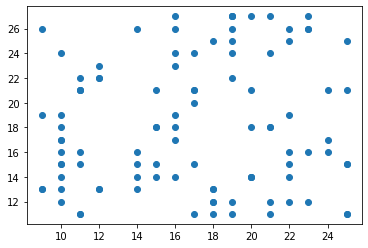

In [16]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(Cancer_data['radius'],Cancer_data['texture'])
plt.show()

In [18]:
# Building Classification Model
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
#separating dependent and independent variables
feature_columns = ['radius', 'texture', 'perimeter','area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
X = Cancer_data[feature_columns].values
y = Cancer_data['diagnosis_result'].values

In [21]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

[Text(0.4444444444444444, 0.9166666666666666, 'X[2] <= 87.5\ngini = 0.485\nsamples = 63\nvalue = [26, 37]'),
 Text(0.2222222222222222, 0.75, 'X[5] <= 0.109\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[5] <= 0.127\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.4166666666666667, 'X[0] <= 15.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.3333333333333333, 0.25, 'X[2] <= 68.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6666666666666666, 0.75, 'X[6] <= 0.211\ngini

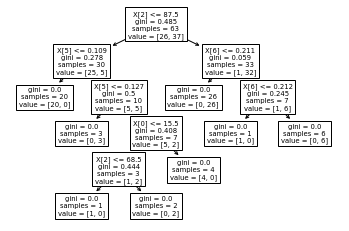

In [24]:
#Creating the decsion tree
Cancer_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Cancer_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(Cancer_clf)

In [25]:
#Visualizing Decision Tree using graphviz library
#dot_data = tree.export_graphviz(Cancer_clf, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

In [26]:
#Accuracy
print('Accuracy score is:',cross_val_score(Cancer_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.8412698412698413


In [27]:
#Checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Cancer_clf.predict(Xcv)

In [28]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8571428571428571


array([[[3, 0],
        [1, 3]],

       [[3, 1],
        [0, 3]]], dtype=int64)

In [29]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Cancer_clf.predict(Xtest)
YT_hat

array(['M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M'], dtype=object)

In [30]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 76.66666666666667 %


array([[[18,  4],
        [ 3,  5]],

       [[ 5,  3],
        [ 4, 18]]], dtype=int64)

[Text(0.5, 0.9166666666666666, 'X[2] <= 87.5\ngini = 0.49\nsamples = 70\nvalue = [30, 40]'),
 Text(0.16666666666666666, 0.75, 'X[5] <= 0.109\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(0.08333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.25, 0.5833333333333334, 'X[5] <= 0.127\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[0] <= 15.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'X[3] <= 315.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4166666666666667, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8333333333333334, 0.75, 'X[4] <= 0.136\ngini = 0.102\nsamples = 37\nvalue = [2, 35]

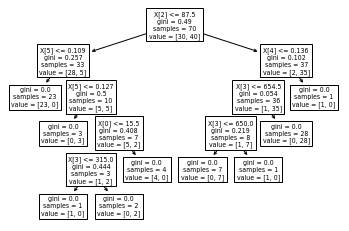

In [31]:
#Training model on Actual train data... '''
Cancer_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Cancer_Fclf.fit(Xtrain, Ytrain)
#Visualize tree structure..
tree.plot_tree(Cancer_Fclf)

In [32]:
#Final Decision tree build for deploying in real world cases....
#dot_data = tree.export_graphviz(Cancer_Fclf, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

In [33]:
#Checking the performance of model on Actual Test data...
YT_Fhat = Cancer_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 70.0 %


array([[[16,  6],
        [ 3,  5]],

       [[ 5,  3],
        [ 6, 16]]], dtype=int64)

In [34]:
#Testing for New points except from Dataset
#Test_point = [[5.4,3.0,4.5,1.5],
             #[6.5,2.8,4.6,1.5],
             #[5.1,2.5,3.0,1.1,-0.5,1.4],
             #[5.1,3.3,1.7,0.5,1.6,2.8]]
#print(Cancer_Fclf.predict(Test_point))